<a href="https://colab.research.google.com/github/Takuya1031/teaching-dl-course-2019/blob/Takuya/IdentifyPoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from keras.models import Sequential # Model type to be used
from keras.layers import Dense, Activation, Dropout# Make Fully connected (FC) layers
from keras.utils import np_utils  # NumPy related tools
from keras.callbacks import TensorBoard  #Visulization of Accuracy and loss
!pip install tensorboardcolab
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
import math

In [0]:
%matplotlib inline
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [0]:
def rand_ints_dup(a, b, k):
  return [random.randint(a, b) for i in range(k)]

numbertraindata = 60000
numbervaldata = 10000

TrainX = np.zeros([numbertraindata,16,16], dtype = 'uint8')
TrainY = np.zeros(numbertraindata, dtype = 'uint8')
for n in range(TrainX.shape[0]):
  numx = rand_ints_dup(0, TrainX.shape[1]/2-1,2)
  numy = rand_ints_dup(0, TrainX.shape[2]/2-1,2)
  TrainX[n,numx[0]*2,numy[0]*2] = 1
  TrainX[n,numx[1]*2,numy[1]*2] = 1
  TrainY[n] = 2

for n in range(math.floor(TrainX.shape[0]/2)):
  numb = random.randint(0, TrainX.shape[0]-1)
  TrainX[numb,] = np.zeros([16,16], dtype = 'uint8')
  numx = rand_ints_dup(0, TrainX.shape[1]-1,1)
  numy = rand_ints_dup(0, TrainX.shape[2]-1,1)
  TrainX[numb,numx[0],numy[0]] = 1
  TrainY[numb] = 1

ValX = np.zeros([numbervaldata,16,16], dtype = 'uint8')
ValY = np.zeros(numbervaldata, dtype = 'uint8')
for n in range(ValX.shape[0]):
  numx = rand_ints_dup(0, ValX.shape[1]/2-1,2)
  numy = rand_ints_dup(0, ValX.shape[2]/2-1,2)
  ValX[n,numx[0]*2,numy[0]*2] = 1
  ValX[n,numx[1]*2,numy[1]*2] = 1
  ValY[n] = 2

for n in range(math.floor(ValX.shape[0]/2)):
  numb = random.randint(0, ValX.shape[0]-1)
  ValX[numb,] = np.zeros([16,16], dtype = 'uint8')
  numx = rand_ints_dup(0, ValX.shape[1]-1,1)
  numy = rand_ints_dup(0, ValX.shape[2]-1,1)
  ValX[numb,numx[0],numy[0]] = 1
  ValY[numb] = 1



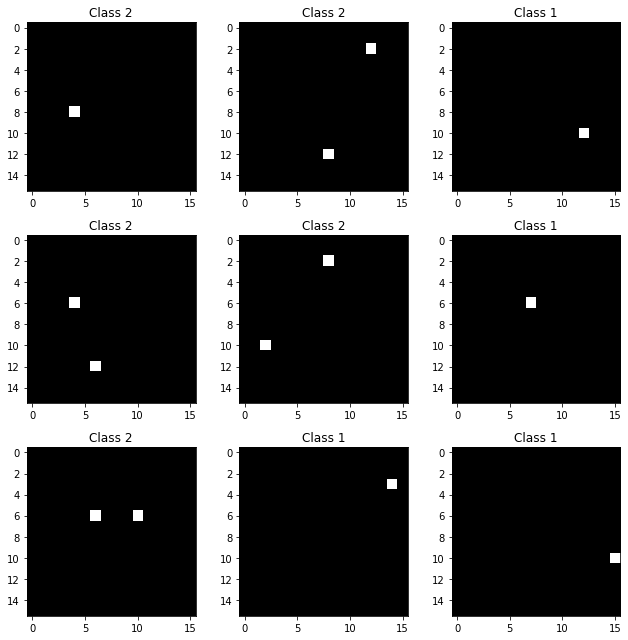

In [68]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(TrainX))
    plt.imshow(TrainX[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(TrainY[num]))
    
plt.tight_layout()

In [0]:
# import some additional tools

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [70]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

TrainX = TrainX.reshape(TrainX.shape[0], 16, 16, 1).astype('float32') #add an additional dimension to represent the single-channel
ValX = ValX.reshape(ValX.shape[0], 16, 16, 1).astype('float32')

#X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
#X_test /= 255

print("Training matrix shape", TrainX.shape)
print("Testing matrix shape", ValX.shape)

Training matrix shape (60000, 16, 16, 1)
Testing matrix shape (10000, 16, 16, 1)


In [0]:
# one hot encode outputs
TrainY2 = np_utils.to_categorical(TrainY)
ValY2 = np_utils.to_categorical(TrainY)

In [72]:
modelCNN = Sequential([
    
    # Convolution Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(16, 16, 1)), # 32 different 3x3 kernels -- so 32 feature maps
    MaxPooling2D(pool_size=(2, 2)), # Pool the max values over a 2x2 kernel

    # Convolution Layer 2
    Conv2D(64, (3, 3), activation='relu'), # 64 different 3x3 kernels 
    MaxPooling2D(pool_size=(2, 2)),

    # Convolution Layer 3
    Conv2D(128, (3, 3), activation='relu'), # 128 different 3x3 kernels

    Flatten(), # Flatten final 7x7x128 output matrix into a 1024-length vector 

    # Fully Connected Layer 4
    Dense(512), # 512 FCN nodes
    Activation('relu'),
    Dropout(0.2),
    Dense(10),
    Activation('softmax'),
])
modelCNN.summary()

ValueError: ignored